In [1]:
import pandas
df = pandas.read_csv("../datasets/heights_weights_genders.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [2]:
grouped = df.groupby("Gender")

Gender
Female    AxesSubplot(0.125,0.125;0.775x0.755)
Male      AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

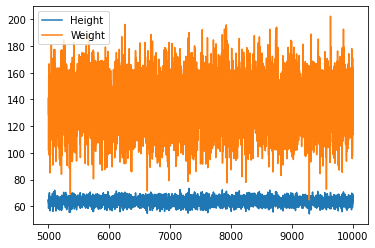

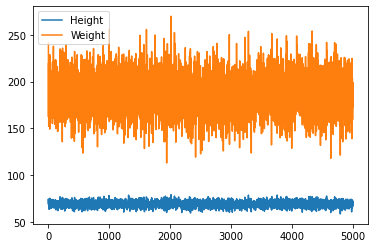

In [3]:
grouped.plot()

<AxesSubplot:xlabel='Gender'>

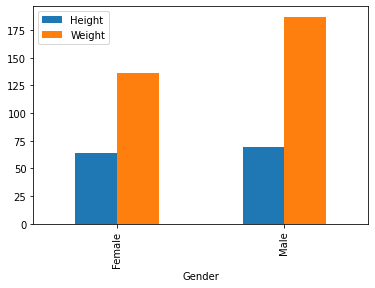

In [4]:
grouped.mean().plot(kind='bar')

In [5]:
import matplotlib
import matplotlib.pyplot as plt

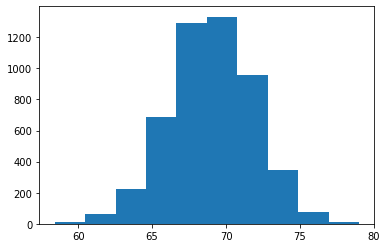

In [6]:
hist = plt.hist(df[df.Gender == 'Male']['Height'])

In [7]:
def estimate_mu(values):
    return values.sum() / len(values)

In [8]:
estimate_mu(df['Height'])

66.36755975482124

In [9]:
def estimate_variance(values):
    sqsum = 0
    mu = estimate_mu(values)
    for x in values: 
        sqsum += (x - mu) ** 2
    return sqsum / len(values)

In [10]:
estimate_variance(df['Height'])

14.8019922928768

In [11]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [12]:
train_docs = [
    "Chinese Beijing Chinese",
    "Chinese Chinese Shanghai",
    "Chinese Macao",
    "Tokyo Japan Chinese",
]
y_train = [1, 1, 1, 0]

test_docs = [
    "Chinese Chinese Chinese Tokyo Japan"
]

In [13]:
def tokenize(docs):
    return [doc.split() for doc in docs]

tokenized_train_docs = tokenize(train_docs)
tokenized_test_docs = tokenize(test_docs)

In [14]:
word_ids = {}

for d in tokenized_train_docs:
    for w in d:
        if w in word_ids:
            continue
        word_ids[w] = len(word_ids)

print(word_ids)

{'Chinese': 0, 'Beijing': 1, 'Shanghai': 2, 'Macao': 3, 'Tokyo': 4, 'Japan': 5}


In [15]:
import numpy as np

x_train = np.zeros((len(tokenized_train_docs), len(word_ids)))
x_test = np.zeros((len(tokenized_test_docs), len(word_ids)))

print(x_train)
print(x_test)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0.]]


In [16]:
for i, d in enumerate(tokenized_train_docs):
    for w in d:
        x_train[i][word_ids[w]] += 1
        
print(x_train)
    

[[2. 1. 0. 0. 0. 0.]
 [2. 0. 1. 0. 0. 0.]
 [1. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 1. 1.]]


In [17]:
for i, d in enumerate(tokenized_test_docs):
    for w in d:
        x_test[i][word_ids[w]] += 1
        
print(x_test)
    

[[3. 0. 0. 0. 1. 1.]]


In [18]:
from collections import defaultdict 

prior = [0, 0]
condprob = defaultdict(dict)

for c in (0, 1):
    prior[c] = y_train.count(c) / len(y_train)
    
    text = []
    for i, doc in enumerate(tokenized_train_docs):
        if y_train[i] != c:
            continue
        text.extend(doc)
    
    for t, tid in word_ids.items():
        t_ct = text.count(t)
        condprob[t][c] = (t_ct + 1) / (len(word_ids) + len(text))
        
print(prior)
print(list(condprob.values()))

[0.25, 0.75]
[{0: 0.2222222222222222, 1: 0.42857142857142855}, {0: 0.1111111111111111, 1: 0.14285714285714285}, {0: 0.1111111111111111, 1: 0.14285714285714285}, {0: 0.1111111111111111, 1: 0.14285714285714285}, {0: 0.2222222222222222, 1: 0.07142857142857142}, {0: 0.2222222222222222, 1: 0.07142857142857142}]


In [19]:
train_authors = ['Milos', 'Jessy', 'Milos', 'Jiyang']
test_authors = ['Milos']

In [20]:
author_to_id = {}
for author in train_authors:
    if author not in author_to_id:
        author_to_id[author] = len(author_to_id)

In [21]:
author_to_id

{'Milos': 0, 'Jessy': 1, 'Jiyang': 2}

In [22]:
import numpy as np

x_train_authors = np.zeros((len(train_docs), len(author_to_id)))
x_test_authors = np.zeros((len(test_docs), len(author_to_id)))

print(x_train_authors)
print(x_test_authors)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]]


In [23]:
for i, author in enumerate(train_authors):
    x_train_authors[i][author_to_id[author]] += 1

In [24]:
print(x_train_authors)

[[1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [25]:
for i, author in enumerate(test_authors):
    x_test_authors[i][author_to_id[author]] += 1
    
print(x_test_authors)

[[1. 0. 0.]]


In [26]:
x_train = np.hstack((x_train, x_train_authors))
x_test = np.hstack((x_test, x_test_authors))

print(x_train, '\n\n', x_test)

[[2. 1. 0. 0. 0. 0. 1. 0. 0.]
 [2. 0. 1. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 1. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 1. 1. 0. 0. 1.]] 

 [[3. 0. 0. 0. 1. 1. 1. 0. 0.]]


In [27]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [28]:
model.predict(x_test)

array([1])

In [29]:
model.predict_proba(x_test)

array([[0.17915696, 0.82084304]])

In [30]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

x_train_authors = encoder.fit_transform([[x] for x in train_authors])
x_train_authors.toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

df_train = pd.DataFrame({'docs': train_docs, 'authors': train_authors})
df_test = pd.DataFrame({'docs': test_docs, 'authors': test_authors})

v = ColumnTransformer([
    ("docs", CountVectorizer(), "docs"),
    ("authors", OneHotEncoder(), ["authors"])
])

In [35]:
x_train = v.fit_transform(df_train)

In [36]:
x_train

array([[1., 2., 0., 0., 0., 0., 0., 0., 1.],
       [0., 2., 0., 0., 1., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0., 1., 0., 1., 0.]])

In [37]:
model = MultinomialNB()
s = model.fit(x_train, y_train)
model.predict(x_test)

array([1])

In [38]:
def avg_word_len(doc):
    return np.mean([len(word) for word in doc.split()])

wl_train = [avg_word_len(doc) for doc in train_docs]

In [39]:
wl_train

[7.0, 7.333333333333333, 6.0, 5.666666666666667]

In [42]:
v = ColumnTransformer([
    ("docs", CountVectorizer(), "docs"),
    ("authors", OneHotEncoder(), ["authors"])
], remainder='passthrough')

train_df = df_train.join(pd.DataFrame({"wl": wl_train}))
print(train_df)

                       docs authors        wl
0   Chinese Beijing Chinese   Milos  7.000000
1  Chinese Chinese Shanghai   Jessy  7.333333
2             Chinese Macao   Milos  6.000000
3       Tokyo Japan Chinese  Jiyang  5.666667


In [43]:
x_train = v.fit_transform(train_df)

In [44]:
x_train

array([[1.        , 2.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 7.        ],
       [0.        , 2.        , 0.        , 0.        , 1.        ,
        0.        , 1.        , 0.        , 0.        , 7.33333333],
       [0.        , 1.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 6.        ],
       [0.        , 1.        , 1.        , 0.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 5.66666667]])

# Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
s = model.fit(x_train, y_train)
# model.predict(x_test) # need to concateneate new features on the test set

ValueError: operands could not be broadcast together with shapes (1,9) (2,) 